# パート I: Qiskit 入門

Qiskitへようこそ! 演習を開始する前に、「Shift」+「Return」を押して下のセルを実行してください。以下の他のセルも同様に実行できます。

In [ ]:
import numpy as np
from numpy import pi

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_textbook.problems import dj_problem_oracle

## I.1: 1 量子ビットの基本的な回転とブロッホ球での測定

多くの量子ビットを持つ複雑な回路に取り組む前に、単一の量子ビットを見てみましょう。この章を読んでください: https://qiskit.org/textbook/ch-states/introduction.html

ブロッホ球、パウリ演算子、アダマール・ゲート、 $S$ および $S^\dagger$ ゲートの基本を学ぶのに役立ちます。

デフォルトでは、Qiskit の状態は $|0\rangle$ で始まります。これは、ブロッホ球の「上向き矢印」に対応します。ゲート $X$  、$Y$、 $Z$ 、 $H$ 、 $S$ 、および $S^\dagger$ を触って、さまざまな回転の感覚を掴んでください。これを行うには、プログラムで示されている行に次のコード行の組み合わせを挿入します。

```
qc.x(0)    # rotation by Pi around the x-axis
qc.y(0)    # rotation by Pi around the y-axis
qc.z(0)    # rotation by Pi around the z-axis
qc.s(0)    # rotation by Pi/2 around the z-axis
qc.sdg(0)  # rotation by -Pi/2 around the z-axis
qc.h(0)    # rotation by Pi around an axis located halfway between x and z
```

次の演習のそれぞれで、正しい回転を適用して、ブロッホ球の特定の状態に到達するようにしてください (Shift + Enter キーを押してコード・セルを実行します)。

### 1.) ビット・フリップを実行して気軽に始めましょう。目標は状態 $|1\rangle$ に到達することです。

<div>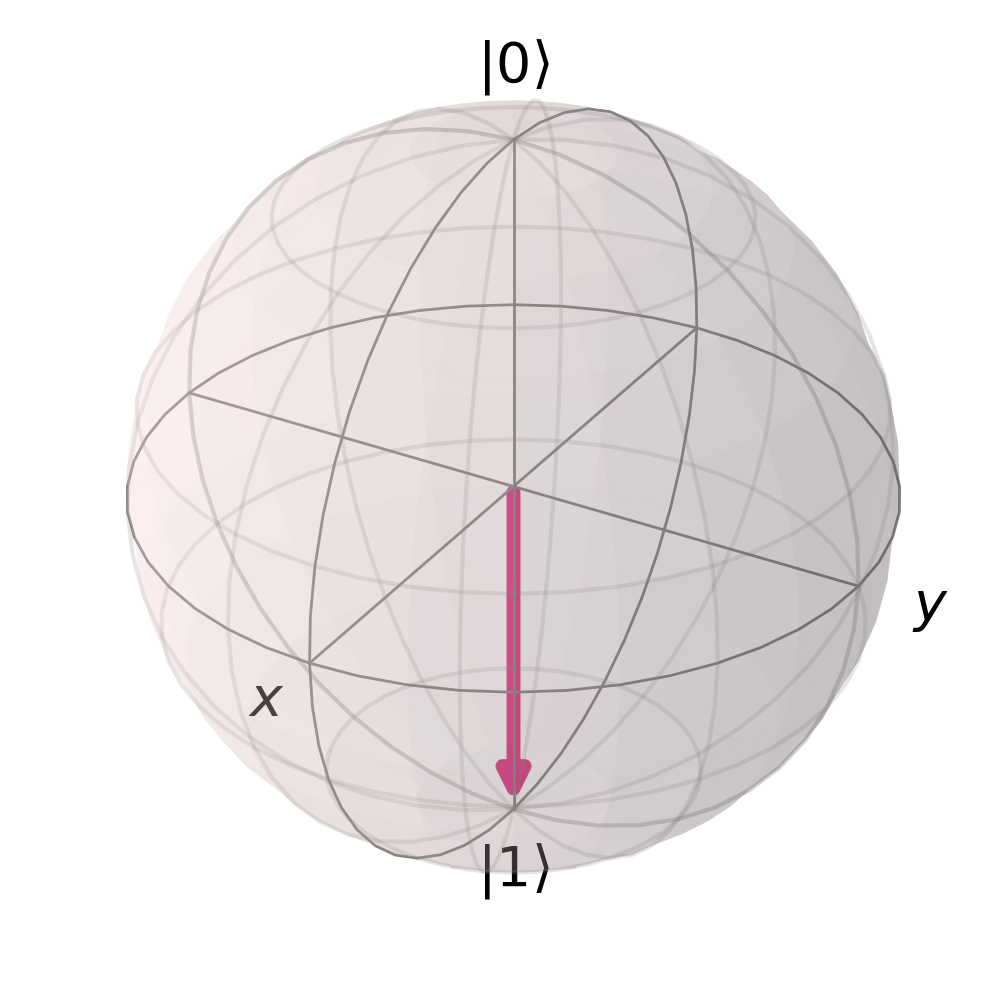</div>

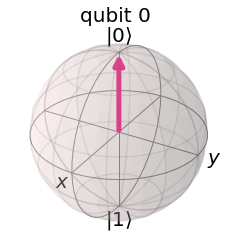

In [2]:
def lab1_ex1():
    qc = QuantumCircuit(1)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc


state = Statevector.from_instruction(lab1_ex1())
plot_bloch_multivector(state)

In [ ]:
from qc_grader.challenges.qgss_2022 import grade_lab1_ex1

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex1(lab1_ex1())

### 2.) 次に、重ね合わせを作成します。目標は、状態 $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$ に到達することです。

<div>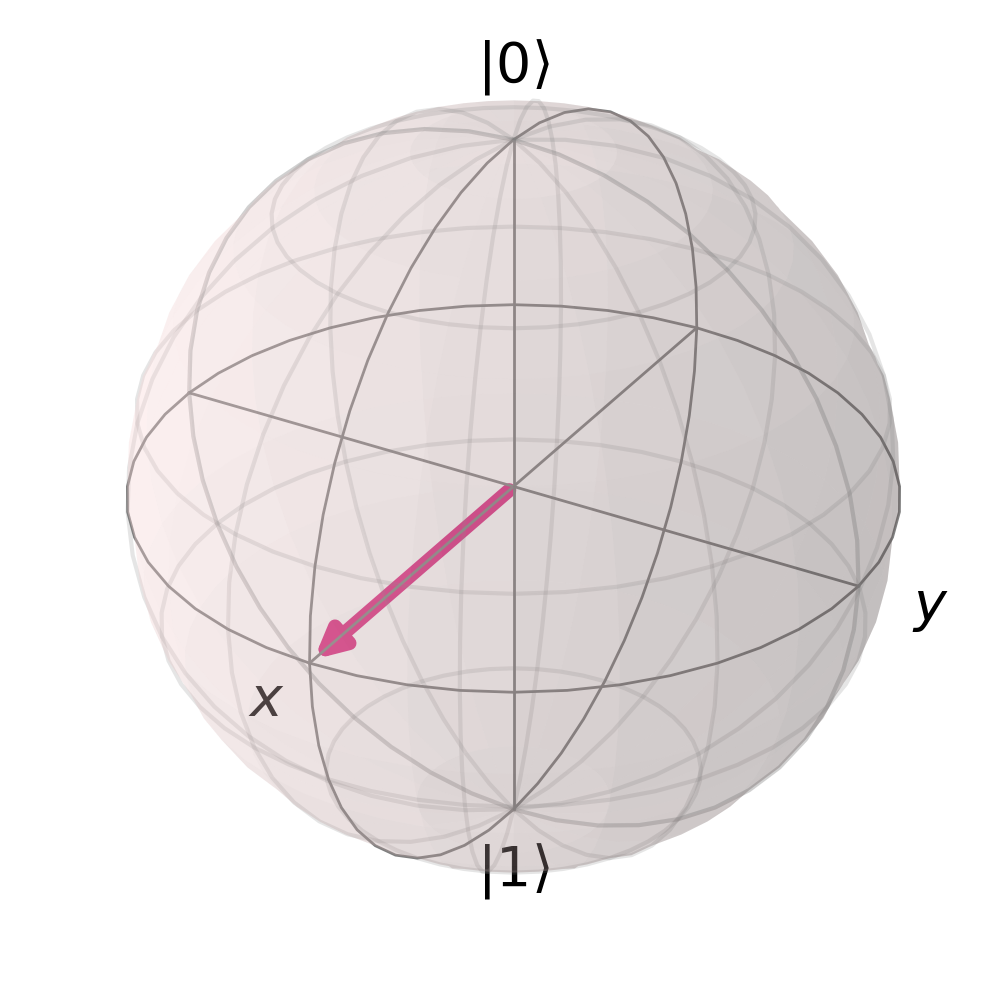</div>

In [ ]:
def lab1_ex2():
    qc = QuantumCircuit(1)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

state = Statevector.from_instruction(lab1_ex2())
plot_bloch_multivector(state)

In [ ]:
from qc_grader.challenges.qgss_2022 import grade_lab1_ex2

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex2(lab1_ex2())

### 3.) 前に見た 2 つの操作を組み合わせてみましょう。目標は、状態 $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$ に到達することです。

<div>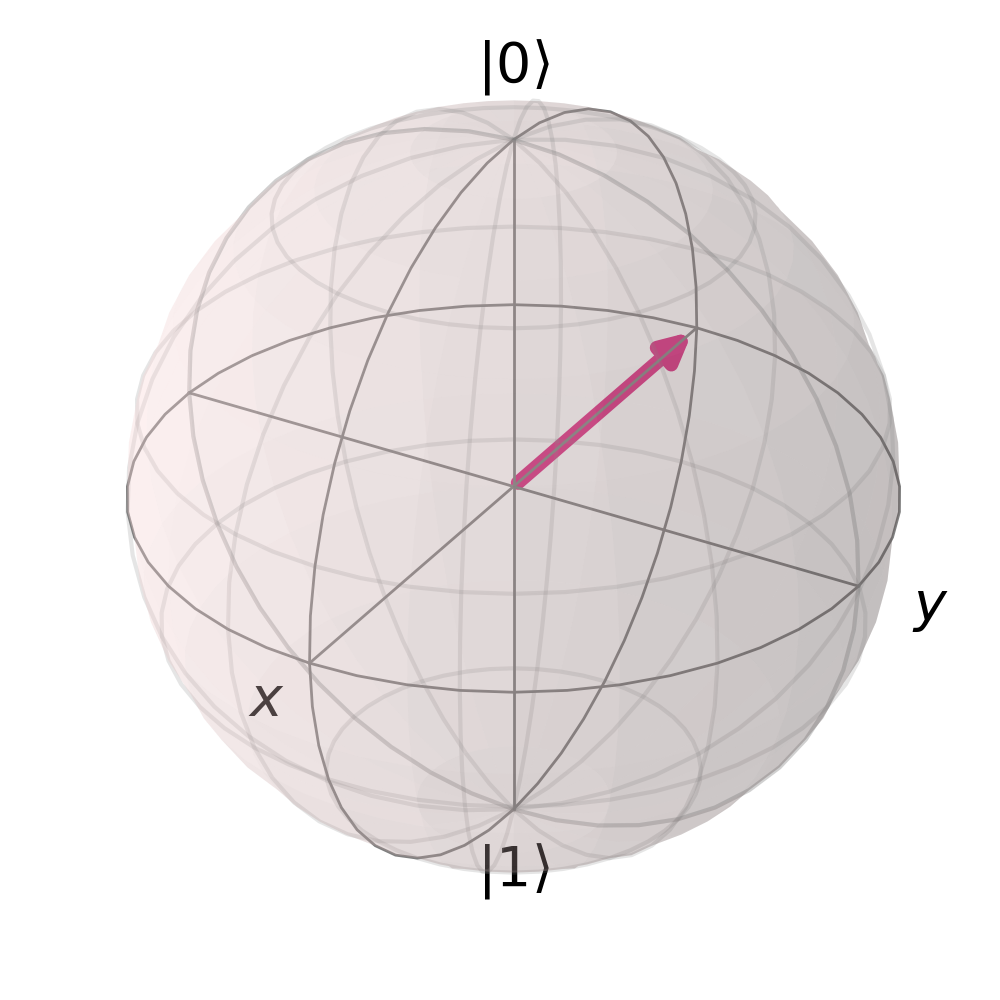</div>

その他の方法を考え出すことができますか？

In [ ]:
def lab1_ex3():
    qc = QuantumCircuit(1)
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

state = Statevector.from_instruction(lab1_ex3())
plot_bloch_multivector(state)

In [ ]:
from qc_grader.challenges.qgss_2022 import grade_lab1_ex3

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex3(lab1_ex3())

### 4.) 最後に、複素数に移行します。目標は、状態 $|- i\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$ に到達することです。

<div>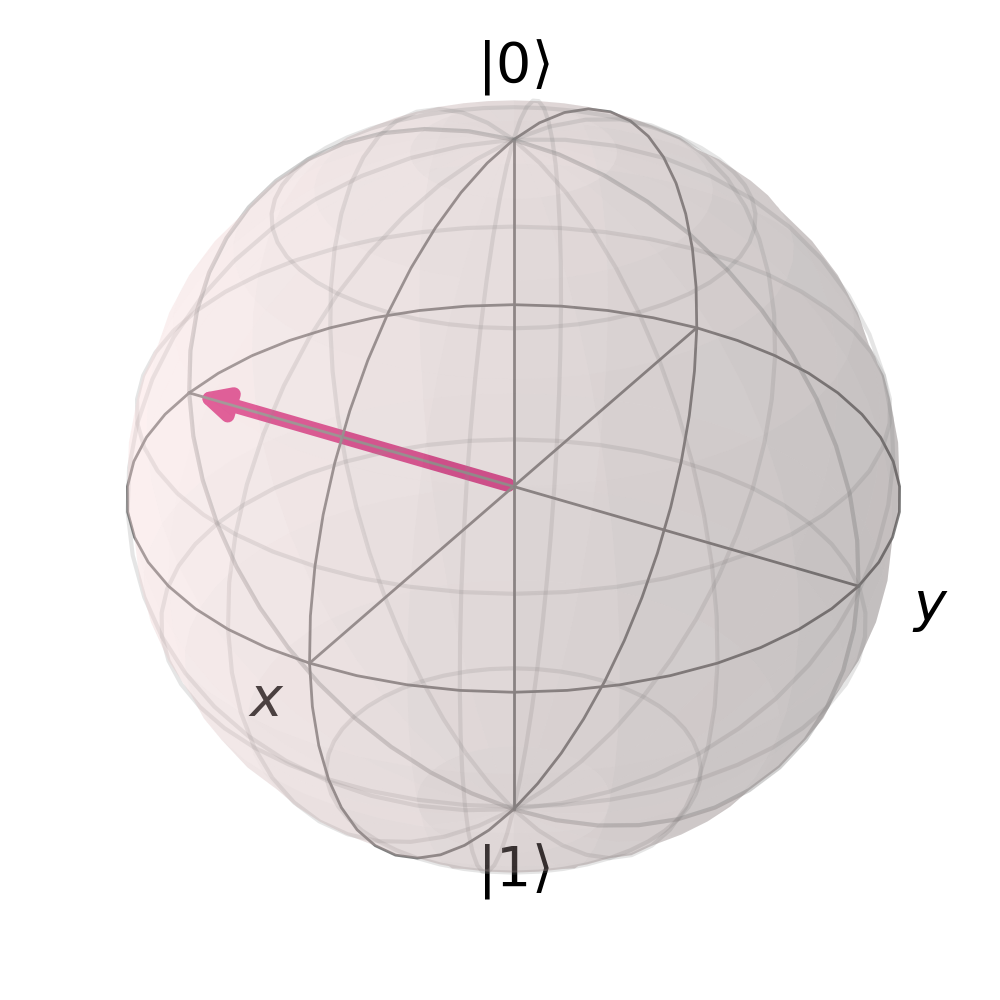</div>

In [ ]:
def lab1_ex4():
    qc = QuantumCircuit(1)
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

state = Statevector.from_instruction(lab1_ex4())
plot_bloch_multivector(state)

In [ ]:
from qc_grader.challenges.qgss_2022 import grade_lab1_ex4

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex4(lab1_ex4())

## I.2: 複数量子ビット・ゲートを使用した量子回路

よくできました! 単一量子ビットのゲートを理解したので、複数量子ビットのゲートを見てみましょう。理論を再確認したい場合は、この章をチェックしてください: https://qiskit.org/textbook/ch-gates/introduction.html

2 および 3 量子ビットの基本的なゲートは、次の様に与えられます。

```
qc.cx(c,t)       # controlled-X (= CNOT) gate with control qubit c and target qubit t
qc.cz(c,t)       # controlled-Z gate with control qubit c and target qubit t
qc.ccx(c1,c2,t)  # controlled-controlled-X (= Toffoli) gate with control qubits c1 and c2 and target qubit t
qc.swap(a,b)     # SWAP gate that swaps the states of qubit a and qubit b
```

まず、2 量子ビットの簡単なゲート、制御 NOT (CNOT) ゲートから始めます。 CNOT ゲートは、状態 $|0\rangle$ の 2 つの量子ビットに適用しても効果がありませんが、制御量子ビットに前にアダマール ゲートを適用して重ね合わせを行うと、もつれを作成できるようになります。結果として得られる状態は、いわゆるベル状態の 1 つです。全部で 4 つの ベル状態があるので、別の状態も構築してみましょう。

### 5.) ベル状態 $|\Psi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$ を構築します。

In [ ]:
def lab1_ex5():
    # This time, we not only want two qubits, but also two classical bits for the measurement
    qc = QuantumCircuit(2,2) 
    #
    #
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

qc = lab1_ex5()
qc.draw() # we draw the circuit

In [ ]:
from qc_grader.challenges.qgss_2022 import grade_lab1_ex5

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex5(lab1_ex5())

上記の回路に測定を追加して、(シミュレーターを使用して) 実行し、対応するカウントのヒストグラムをプロットします。

In [ ]:
qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

ヒストグラムからわかるように、可能な出力は "01" と "10" のみであるため、2 つの量子ビットの状態は常に完全に反相関しています。

### 6.) 3 量子ビットで量子回路を構築し、GHZのような状態  $|\Psi\rangle = \frac{1}{\sqrt{2}} \left(|011\rangle - | 100 \rangle \right)$ を作成する関数を記述します。

ヒント: 次の回路は GHZ 状態 $|GHZ\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$ を構築します:

<div>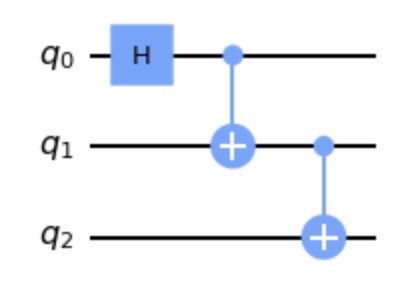</div>

In [ ]:
def lab1_ex6():
    # This time, we need 3 qubits and also add 3 classical bits in case we want to measure
    qc = QuantumCircuit(3,3) 
    #
    #
    # FILL YOUR CODE IN HERE
    #
    return qc

qc = lab1_ex6()
qc.draw() # we draw the circuit

この回路も、以前と同じ方法で測定できます。

In [10]:
qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

In [ ]:
from qc_grader.challenges.qgss_2022 import grade_lab1_ex6

# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex6(lab1_ex6())

入門演習の完了、おめでとうございます! ブロッホ球と基本的な量子ゲートについて理解を深めていただければ幸いです。 

# パート II: 量子回路と複雑さ

## II.1: ゲート数の複雑さ

ゲートを使用する場合、さまざまな複雑さのクラスとビッグ $O$ 表記、およびそれを量子アルゴリズムで使用する方法を見てきました。アルゴリズムの複雑さを計算する 1 つの方法は、使用されたゲートの数を数えることです。

もう 1 つのよく見られる測定法は、すべてのゲートではなく複数量子ビット・ゲートの数を数えることです。これは通常、他のゲートよりも「高価」であるためです。私たちの場合、「より高価」とは、単一量子ビット・ゲートと比較して、エラー率が非常に高いこと (約 10 倍) を意味します。

それでは、GHZ 状態をもう一度見て、ゲート数と複数量子ビット・ ゲート数を数えてみましょう。

In [11]:
qc = QuantumCircuit(3)

qc.h(0)
qc.cx(0,1)
qc.cx(0,2)

print(qc.size())
print(qc.num_nonlocal_gates())


3
2


もちろん、この例ではゲートの数は 3 で、複数量子ビット・ゲートの数は 2 です。ゲートごとに自分で追加したため、この場合は明らかかもしれませんが、アルゴリズムを使用して量子回路を構築する場合、それほど明白ではありません。


### II.1.1: 量子フーリエ変換の例

講義でも取り上げた量子フーリエ変換の例を見てみましょう。これについてもっと学びたい場合、または知識を新たにしたい場合は、次の章を読むことができます: https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html


In [5]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)
    
def swap_registers(circuit, n):
    """Swaps registers to match the definition"""
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

ここでは、量子フーリエ変換全体を行うのではなく、回転のみを行います。そして、それらを上で定義した量子状態に適用し、使用された操作の数を測定しましょう。


9
5


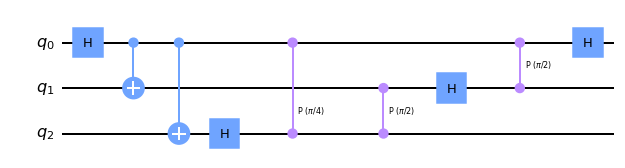

In [12]:
qft_rotations(qc,3)
print(qc.size())
print(qc.num_nonlocal_gates())
qc.draw()

ご覧のとおり、最初の 3 つのゲートは GHZ 状態からのもので、他の 6 つのゲートはフーリエ変換からのものであり、どの状態に適用しても同じに見え、常に同じ量のゲートが必要です。これは、次の例において、すべて 0 の状態 (構築にゲートを必要としない基本状態) と、フーリエ変換自体のゲート数だけを考慮することができることを意味します。

テキストブックでは、スケーラブルな回路ウィジェットを使用して、フーリエ変換回路がより多くの回路に適用するにつれてどのように大きくなるかを確認できます。ここを参照してください: https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html#8.2-General-QFT-Function-

ただし、量子ビットが増えた場合回路がどのように見えるかよりも、回路に必要なゲート数がどの程度になるかに関心があります。 3 量子ビットの場合、量子フーリエ変換 (スワップなし) には合計 6 ゲートが必要であることがわかりました。 4、5、10、100、200 量子ビットにはいくつ必要ですか?

注: 複数量子ビット・ゲートの数ではなく、ゲートの総数を求めます (ただし、ゲートの総数の解が見つかっていれば、これも簡単に計算できます)。


In [ ]:
def lab1_ex7(n:int) -> int:
    #Here we want you to build a function calculating the number of gates needed by the fourier rotation for n qubits.
    
    numberOfGates=0 
    #
    # FILL YOUR CODE IN HERE
    # TRY TO FIND AN EXPLIZIT (NON RECURSIVE) FUNCTION
    #
    return numberOfGates

print(lab1_ex7(3))
print(lab1_ex7(4))
print(lab1_ex7(5))
print(lab1_ex7(10))
print(lab1_ex7(100))
print(lab1_ex7(200))

      


In [ ]:
# Lab 1, Exercise 7
from qc_grader.challenges.qgss_2022 import grade_lab1_ex7

# Note that the grading function is expecting as input a function! 
#(And the function takes n as an input and outputs the number of gates constructed)
grade_lab1_ex7(lab1_ex7)

上で見たように、量子フーリエ変換のアルゴリズムには $O(n^2)$ 個のゲートが必要であり、 $O(n^2)$ 個の2 量子ビット・ゲートも必要であることも簡単にわかります。

アルゴリズムが再帰的ではなく、代わりにいくつかのループを使用する場合、これはさらに分かりやすくなります。

したがって、(再帰的) アルゴリズムの複雑さを分析する際に問題が発生した場合は、単純なループを使用して書き直してみてください。

## II.2: 回路の深さの複雑さ

回路が実際の量子コンピュータでどれだけうまく動作するかということになると、ゲートの数だけが重要な要素ではありません。

回路の深さは、回路によって定義された計算を完了するために、並列に実行される量子ゲートの「層」の数を示します。詳細については、https://qiskit.org/documentation/apidoc/circuit.html#supplementary-information を参照してください。特に、テトリスと比較したアニメーションは、深さの概念を理解するのに役立ちます ([量子回路のプロパティ] を開いて確認してください)。

次に、回路の深さを示す 2 つの簡単な例を見てみましょう。


6


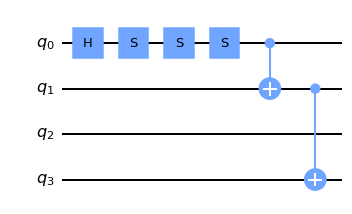

In [13]:
qc = QuantumCircuit(4)

qc.h(0)
qc.s(0)
qc.s(0)
qc.s(0)
qc.cx(0,1)
qc.cx(1,3)

print(qc.depth())
qc.draw()




2


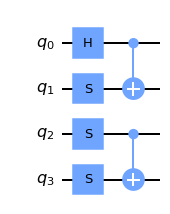

In [14]:
qc2 = QuantumCircuit(4)

qc2.h(0)
qc2.s(1)


qc2.cx(0,1)

qc2.s(2)
qc2.s(3)

qc2.cx(2,3)

print(qc2.depth())

qc2.draw()




上記の回路の長さは幅に対応します。ご覧のとおり、両方の回路のゲート数は同じですが、すべてのゲートが前のゲートに依存しているため、最初の回路の深さがはるかに大きく、並列処理はできません。

つまり、並列に適用できるゲートが多いほど、異なる量子ビットに適用されるため、回路の深さが浅くなります。回路の深さの下限 (量子ビット・ゲートが 1 つしかなく、それらが均等に分散されている場合) は、ゲート数を量子ビット数で割った値です。

一方、量子回路のすべてのゲートが同じ量子ビットに依存している場合、深さは量子ビットの数と同じになります。


## II.2.2: 完全にエンタングルした状態の例

完全にエンタングルした状態の単純な実装の例を見てみましょう。


In [6]:
qc = QuantumCircuit(16)

#Step 1: Preparing the first qubit in superposition
qc.h(0)

#Step 2: Entangling all other qubits with it (1 is included 16 is exclude)
for x in range(1, 16):
  qc.cx(0,x)

print(qc.depth())


16


ご覧のとおり、上記の量子回路の深さはゲート数と同じです。ステップ 1 は深さ 1 を追加し、ステップ 2 は深さ 15 を追加します。

これをもっと上手にやってみましょう！ステップ 1 を改善できないことは明らかですが、ステップ 2 はさらに改善できます。それでは、15 ではなく 4 だけ深さを使用する解決策を見つけてみましょう!

ヒント: 漸近的実行時間がどのようなものであれば、4 つの操作しか起こらないか考えてみましょう。そして、最終的な深さは 5 になることを忘れないでください (ステップ 1 と 2 の組み合わせ)。


In [ ]:
def lab1_ex8():
    qc = QuantumCircuit(16) #Same as above
    
    #Step 1: Preparing the first qubit in superposition
    qc.h(0)
    
    #
    #
    # FILL YOUR CODE IN HERE
    #
    return qc

qc = lab1_ex8()
print(qc.depth())


In [ ]:
from qc_grader.challenges.qgss_2022 import grade_lab1_ex8
# Note that the grading function is expecting a quantum circuit without measurements
grade_lab1_ex8(lab1_ex8())

おめでとうございます! 漸近的な複雑さと量子回路を理解したおかげで、回路の深さが 9 倍改善されました。